### Normal Equation

In [1]:
import numpy as np

In [18]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

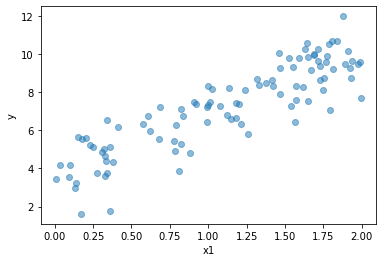

In [28]:
plt.scatter(X.flatten(), y.flatten(), alpha=0.5)
plt.xlabel('x1')
plt.ylabel('y')

In [25]:
## adding x0 = 1 to each observation in X matrix
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [27]:
theta_best # ideal x0 = 4, x1 = 3 as per y function

array([[3.63282236],
       [3.24461751]])

In [31]:
intercept = theta_best[0]
theta_1 = theta_best[1]

### Making Predictions

In [29]:
X_new = np.array([[0], [2]]) # x1 = [0, 2]
X_new_b = np.c_[np.ones((2, 1)), X_new] # add 1 to x0
y_predict = X_new_b.dot(theta_best)

In [30]:
y_predict

array([[ 3.63282236],
       [10.12205738]])

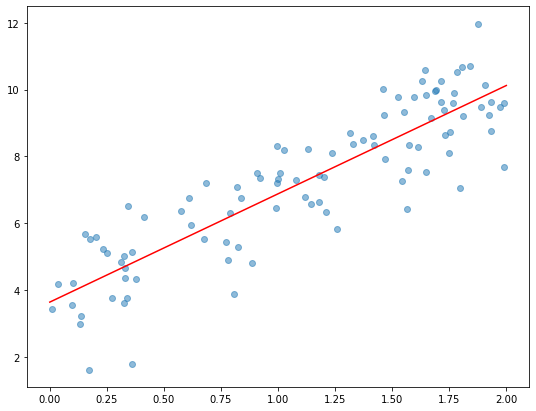

In [36]:
# Initialize layout
fig, ax = plt.subplots(figsize = (9, 7))


ax.scatter(X.flatten(), y.flatten(), alpha=0.5)

ax.plot(X_new, y_predict, "r-")

### Using Scikit learn

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.63282236]), array([[3.24461751]]))

In [39]:
lin_reg.predict(X_new)

array([[ 3.63282236],
       [10.12205738]])

### Gradient Descent

In [40]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

In [41]:
# initialize theta vector randomly
theta = np.random.randn(2,1)
theta

array([[ 0.39840679],
       [-0.23298258]])

In [43]:
for iteration in range(n_iterations):
    # calculate gradient vectors
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - (eta * gradients)

In [44]:
theta

array([[3.63282236],
       [3.24461751]])

### Stochastic Gradient Descent

In [50]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [51]:
def learning_schedule(t):
    return t0 / (t + t1)

In [53]:
theta = np.random.randn(2,1) # random initialisation of theta vector

In [82]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # slice to keep (n, m) shape
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - (eta * gradients)
        

In [83]:
theta

array([[3.58814784],
       [3.26020636]])

In [87]:
# using SGDRegressor (uses Squared Error Cost Function)
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [88]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.63623562]), array([3.28438964]))

### Polynomial Regression

In [89]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

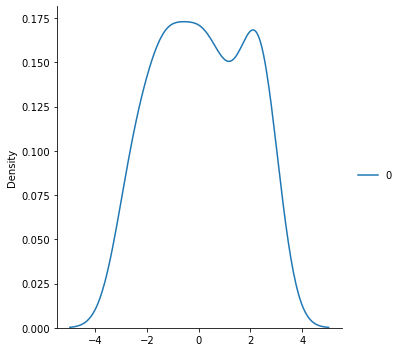

In [97]:
sns.displot(X, kind='kde')

<AxesSubplot:>

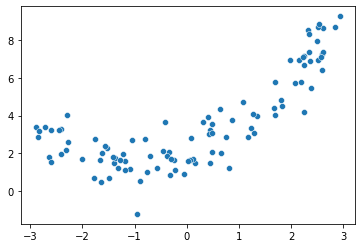

In [99]:
sns.scatterplot(x=X.flatten(), y=y.flatten())

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [102]:
X_poly = poly_features.fit_transform(X)

In [103]:
X[0], X_poly[0]

(array([2.52007753]), array([2.52007753, 6.35079078]))

In [167]:
# fit a Lin Reg model with the extended data
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.95501498]), array([[0.96395264, 0.49264144]]))

In [168]:
# 1.96 + 0.96x1 + 0.49x2**2

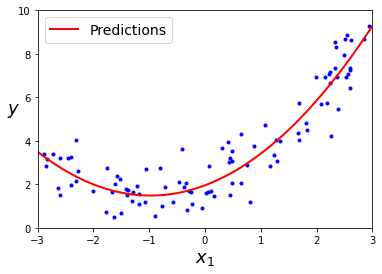

In [170]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### Learning Curves

In [174]:

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

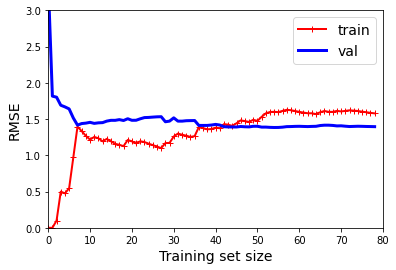

In [175]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
plt.show()                                      